<h1 align = 'center'> Mall Customer Segmentation  </h1>
<ul>
    <li>You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.</li>
    <li>Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.</li>
    <li>You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.</li>
</ul>

###  __[More information on dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)__

<h2>Outline: </h2>

### 1. [Set up](#setup)
### 2. [Segmentation using Spending Score and Annual Income](#seg)
### 3. [K-Means Clustering ](#kmeans)
### 4. [Finding the Optimal number of Clusters](#oc)
### 5. [Elbow Rule](#er)
### 6. [Decision Boundaries](#db)
### 7. [Silhouette Analysis](#sa)
### 8. [Silhouette Diagram](#sd)

<a id = 'setup'></a>

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()        #default theme 

import warnings
warnings.filterwarnings('ignore')  #filter warnings

In [2]:
path = r'C:\Users\Mtronics\Downloads\Datasets\Mall Customer Segmentation\Mall_Customers.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# rename column names

df.rename(columns = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace = True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a id = 'seg'></a>

### Segmentation using Spending Score and Annual income

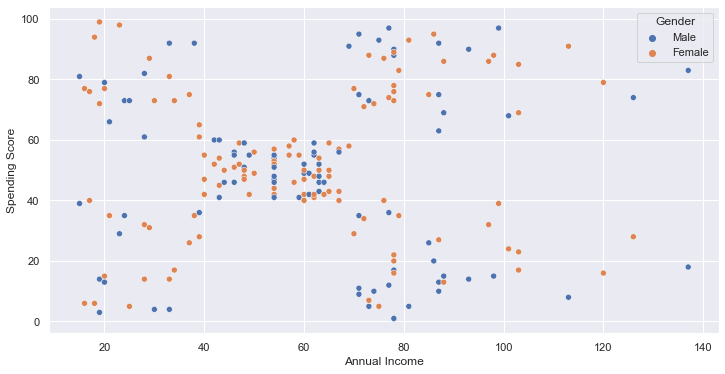

In [7]:
x = df['Annual Income']
y = df['Spending Score']
plt.subplots(figsize = (12, 6))

ax = sns.scatterplot(x, y, data = df, hue = 'Gender')

<a id = 'kmeans'></a>

### K-Means Clustering

In [8]:
X = df[['Annual Income' , 'Spending Score']].iloc[: , :].values

In [9]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters = k)
kmeans.fit(X)

KMeans(n_clusters=5)

In [10]:
# predictions of each instance for clusters labels

kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<a id = 'oc'></a>
<a id = 'er'></a>

## Finding the Optimal number of Clusters
### Elbow Rule

In [11]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

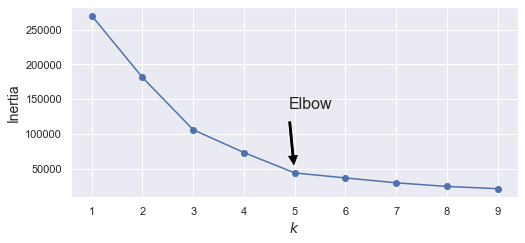

In [35]:
def plot_elbow_figure():
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, 10), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
    
plot_elbow_figure()

As you can see, <b>there is an elbow at k=5,</b> so it might be a good choice but this diagram does not clarifies which one to pick exactly for optimal results. an another approach would be to <b>plot Silhouette coefficients diagram</b> for finding the optimal value of k.

<a id = 'db'></a>

### Decision Boundaries

In [36]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000):
    mins = X.min(axis=0) - 10
    maxs = X.max(axis=0) + 10
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

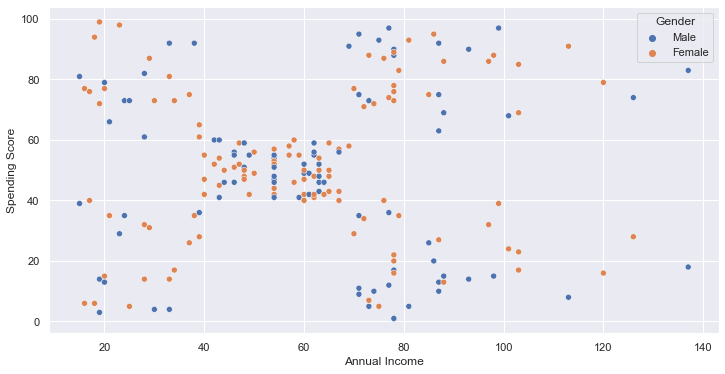

In [37]:
x = df['Annual Income']
y = df['Spending Score']
plt.subplots(figsize = (12, 6))

ax = sns.scatterplot(x, y, data = df, hue = 'Gender')

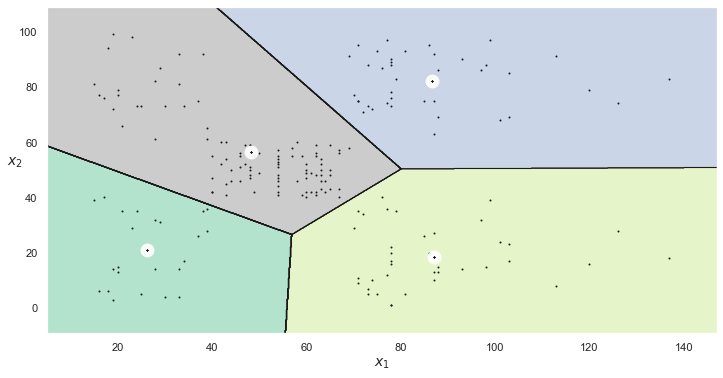

In [38]:
# Clusters with k = 4

plt.figure(figsize = (12, 6))
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

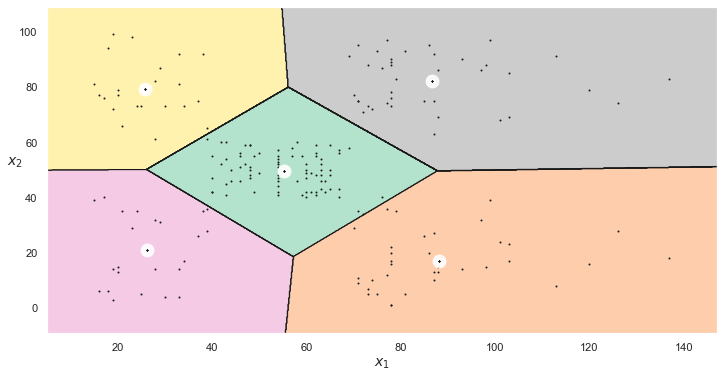

In [39]:
# Clusters with k = 5

plt.figure(figsize = (12, 6))
plot_decision_boundaries(kmeans_per_k[5-1], X)
plt.show()

<a id = 'sa'></a>

## Silhouette Analysis

In [25]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.553931997444648

Text(0, 0.5, 'Silhouette score')

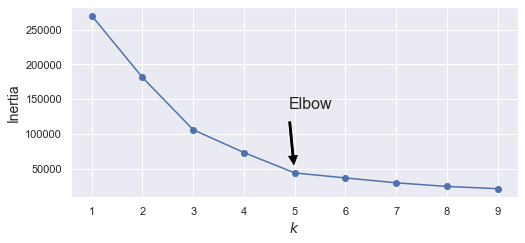

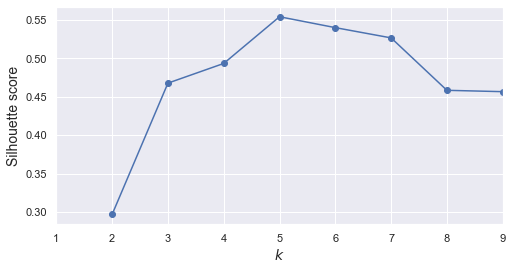

In [44]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plot_elbow_figure()
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.xlim(1, 9)
plt.ylabel("Silhouette score", fontsize=14)

<ul>
    <li>As you can see, Silhouette Score diagram is much richer than the Elbow rule diagram: in particular, <b>it confirms that $k=5$ is a very good choice than k=4 which we can't understand through elbow rule diagram</b></li>
    <li>An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:</li>

<a id = 'sd'></a>

## Silhouette Diagram

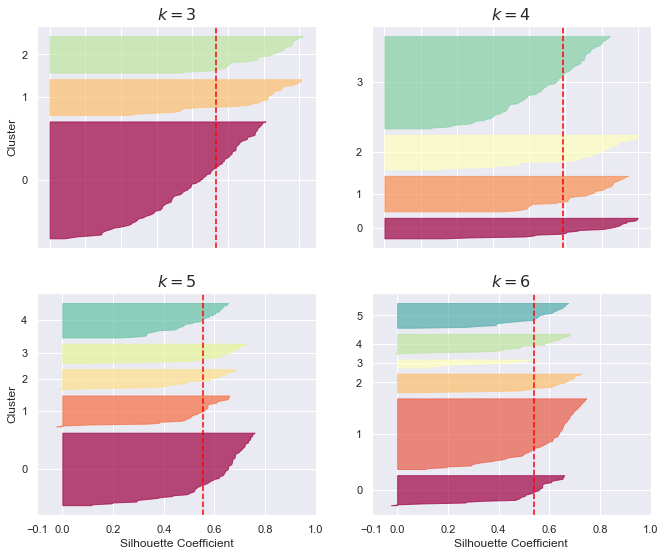

In [54]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

As you can see, <b>$k=5$</b> looks like the best option here, as <b>all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.</b>